# Beer Data: EDA & Cleanup

## Overview
For our first project, we were interested in various types of beers (e.g., styles, products and brands) and the sensory characteristics of beer that may affect how consumers perceive it (i.e., taste ratings). With the surge in popularity of craft beers, the diversity of macro and micro brewery offerings has increased. While increased options may be good for beer consumers, this presents a challenge to distributors and retailers as to what beers to carry when warehouse and shelf space, refrigerated cases and taps are limited.

The goal of our analysis is to answer questions related to popular beer characteristics and styles that could help inform these businesses as they determine what to stock and sell to their customers.

Before performing analysis in a separate notebook, the dataset was cleaned and exploratory data analysis was performed in this notebook; the resulting "clean" CSV file is the source for the dedicated analysis notebook.

## Initial Dataset
We searched public data repository sites and found a beer profile and ratings dataset on Kaggle (Beer Profile and Ratings Data Set [*}. With particular questions in mind, we performed exploratory data analysis alongside cleaning efforts on the initial dataset to better understand its limitations, transform the data to allow for our in-depth analysis and become familiar with the distribution and other characteristics of the dataset (i.e., data types, central tendencies, counts, etc.)

Further details can be found at the source, but we found it important to note that:

- the data contains approximately 3,200 unique beers
- this collection is a merger of two datasets from the popular beer ratings social site Beer Advocate (www.beeradvocate.com)
- per Kaggle, "the purpose (of the merger was) to create a new data set that contains comprehensive consumer review (appearance, aroma, palate, taste and overall review scores) for different brews, combined with their detailed tasting profiles—this is that data set."


As can be seen in this notebook and the Analysis notebook, our focus was on the first set of columns that contained factual information on the beers themselves (e.g., Style) and on the latter set of columns collecting the user ratings data on the beers; we ultimately decided to do little with the middle columns that collected keyword counts from user reviews for various sensory buckets.

[*] Source: https://www.kaggle.com/datasets/ruthgn/beer-profile-and-ratings-data-set


In [1]:
# Import Dependencies
import pandas as pd
from pathlib import Path
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [2]:
# Path to the Kaggle dataset .csv file
csv_path = Path("Resources/Beer Profile and Ratings Data Set-RUTHGN.csv")

# Read file into a Pandas dataframe
beer_df = pd.read_csv(csv_path)

In [3]:
# preview initial dataframe
print(f'Total number of rows: {len(beer_df)}')
print("------------------------")
beer_df.head()

Total number of rows: 3197
------------------------


,Name,Style,Brewery,Beer Name (Full),Description,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Amber,Altbier,Alaskan Brewing Co.,Alaskan Brewing Co. Alaskan Amber,"Notes:Richly malty and long on the palate, wit...",5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Double Bag,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Double Bag,"Notes:This malty, full-bodied double alt is al...",7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Ale,Altbier,Long Trail Brewing Co.,Long Trail Brewing Co. Long Trail Ale,Notes:Long Trail Ale is a full-bodied amber al...,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Doppelsticke,Altbier,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Notes:,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Sleigh'r Dark Doüble Alt Ale,Altbier,Ninkasi Brewing Company,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Notes:Called 'Dark Double Alt' on the label.Se...,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [4]:
# preview full column list and understand data types before performing any transformation
beer_df.dtypes
# the data types by column meet expectatation for our analysis to continue without needing to change any types

Name                  object
Style                 object
Brewery               object
Beer Name (Full)      object
Description           object
ABV                  float64
Min IBU                int64
Max IBU                int64
Astringency            int64
Body                   int64
Alcohol                int64
Bitter                 int64
Sweet                  int64
Sour                   int64
Salty                  int64
Fruits                 int64
Hoppy                  int64
Spices                 int64
Malty                  int64
review_aroma         float64
review_appearance    float64
review_palate        float64
review_taste         float64
review_overall       float64
number_of_reviews      int64
dtype: object

In [5]:
# Identify if any incomplete rows (if null values are present and need to be addressed)
beer_df.count()
# There are no incomplete rows based on matching column counts

Name                 3197
Style                3197
Brewery              3197
Beer Name (Full)     3197
Description          3197
ABV                  3197
Min IBU              3197
Max IBU              3197
Astringency          3197
Body                 3197
Alcohol              3197
Bitter               3197
Sweet                3197
Sour                 3197
Salty                3197
Fruits               3197
Hoppy                3197
Spices               3197
Malty                3197
review_aroma         3197
review_appearance    3197
review_palate        3197
review_taste         3197
review_overall       3197
number_of_reviews    3197
dtype: int64

In [6]:
# List unique values for "Style" to identify potential similarities for further cleaning
print(f"Number of styles: {len(beer_df['Style'].unique())}")
print("------------------------")
print(beer_df['Style'].unique())

Number of styles: 111
------------------------
['Altbier' 'Barleywine - American' 'Barleywine - English'
 'Bitter - English Extra Special / Strong Bitter (ESB)' 'Bitter - English'
 'Bière de Champagne / Bière Brut' 'Blonde Ale - American'
 'Blonde Ale - Belgian' 'Bock - Doppelbock' 'Bock - Eisbock'
 'Bock - Maibock' 'Bock - Traditional' 'Bock - Weizenbock' 'Braggot'
 'Brett Beer' 'Brown Ale - American' 'Brown Ale - Belgian Dark'
 'Brown Ale - English' 'California Common / Steam Beer' 'Chile Beer'
 'Cream Ale' 'Dubbel' 'Farmhouse Ale - Bière de Garde'
 'Farmhouse Ale - Sahti' 'Farmhouse Ale - Saison' 'Fruit and Field Beer'
 'Gruit / Ancient Herbed Ale' 'Happoshu' 'Herb and Spice Beer'
 'IPA - American' 'IPA - Belgian' 'IPA - Black / Cascadian Dark Ale'
 'IPA - English' 'IPA - Imperial' 'IPA - New England' 'Kvass' 'Kölsch'
 'Lager - Adjunct' 'Lager - American Amber / Red' 'Lager - American'
 'Lager - European / Dortmunder Export' 'Lager - European Dark'
 'Lager - European Pale' 'Lager - 

In [7]:
# There are many unique Styles in the data set (111) but it appears some are the same primary beer styles with hyphenated substyles
# Isolate the unique beer Styles, apart from a each beer's substyle on delimiter " - " (space hyphen space)
beer_df[['Style_Main','Style_Sub']] = beer_df.Style.apply(lambda x: pd.Series(str(x).split(" - ")))

# Check count of primary styles after split
print(len(beer_df['Style_Main'].unique()))
beer_df['Style_Main'].unique()
# 43 main styles of beer in the dataset is more manageable to analyze groups based on our initial questions

43


array(['Altbier', 'Barleywine', 'Bitter',
       'Bière de Champagne / Bière Brut', 'Blonde Ale', 'Bock', 'Braggot',
       'Brett Beer', 'Brown Ale', 'California Common / Steam Beer',
       'Chile Beer', 'Cream Ale', 'Dubbel', 'Farmhouse Ale',
       'Fruit and Field Beer', 'Gruit / Ancient Herbed Ale', 'Happoshu',
       'Herb and Spice Beer', 'IPA', 'Kvass', 'Kölsch', 'Lager', 'Lambic',
       'Low Alcohol Beer', 'Mild Ale', 'Old Ale', 'Pale Ale', 'Pilsner',
       'Porter', 'Pumpkin Beer', 'Quadrupel (Quad)', 'Red Ale',
       'Rye Beer', 'Scotch Ale / Wee Heavy', 'Scottish Ale',
       'Smoked Beer', 'Sour', 'Stout', 'Strong Ale', 'Tripel',
       'Wheat Beer', 'Wild Ale', 'Winter Warmer'], dtype=object)

In [8]:
# In the event patterns or trends may be evident, preview beers grouped by Style_Main and sort by highest mean 'review_overall'
style_df = beer_df.groupby(beer_df['Style_Main'])
style_df['review_overall'].mean().sort_values(ascending=False)

Style_Main
Wild Ale                           4.233521
Brett Beer                         4.034746
Bière de Champagne / Bière Brut    4.028639
Quadrupel (Quad)                   3.977484
IPA                                3.972965
Lambic                             3.965786
Stout                              3.947546
Old Ale                            3.940976
Tripel                             3.929589
Sour                               3.928783
Kölsch                             3.921608
Farmhouse Ale                      3.918721
Altbier                            3.917012
Porter                             3.915307
Barleywine                         3.914739
Rye Beer                           3.907612
Scotch Ale / Wee Heavy             3.884646
Strong Ale                         3.864981
Dubbel                             3.853156
Bitter                             3.843378
Pale Ale                           3.828307
California Common / Steam Beer     3.819801
Pilsner              

In [9]:
# Similar to the above, preview beers grouped by Style_Main and sort by highest 'review_overall'
style_df = beer_df.groupby(beer_df['Style_Main'])
style_df['review_overall'].max().sort_values(ascending=False)

Style_Main
Lambic                             5.000000
Wild Ale                           4.807692
Happoshu                           4.750000
Rye Beer                           4.666667
Lager                              4.634615
IPA                                4.625800
Quadrupel (Quad)                   4.617925
Stout                              4.591052
Wheat Beer                         4.562112
Old Ale                            4.550000
Barleywine                         4.546053
Pilsner                            4.534351
Kölsch                             4.516484
Dubbel                             4.514144
Pale Ale                           4.512723
Porter                             4.500000
Sour                               4.500000
Kvass                              4.500000
Altbier                            4.500000
Bock                               4.500000
Bitter                             4.469697
Smoked Beer                        4.444444
Braggot              

In [10]:
# further dataframe cleaning: reorder columns and exclude unnecessary 'Description' and now redundant 'Style' columns
reordered_df = beer_df[['Beer Name (Full)', 'Name', 'Brewery', 'Style_Main', 'Style_Sub',
                    'ABV', 'Min IBU', 'Max IBU', 'Astringency', 'Body', 'Alcohol',
                    'Bitter', 'Sweet', 'Sour', 'Salty', 'Fruits', 'Hoppy', 'Spices',
                    'Malty', 'review_aroma', 'review_appearance', 'review_palate',
                    'review_taste', 'review_overall', 'number_of_reviews'
                    ]].copy()
reordered_df.head()

,Beer Name (Full),Name,Brewery,Style_Main,Style_Sub,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Alaskan Brewing Co. Alaskan Amber,Amber,Alaskan Brewing Co.,Altbier,NaN,5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Long Trail Brewing Co. Double Bag,Double Bag,Long Trail Brewing Co.,Altbier,NaN,7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Brewing Co. Long Trail Ale,Long Trail Ale,Long Trail Brewing Co.,Altbier,NaN,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Doppelsticke,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Altbier,NaN,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Sleigh'r Dark Doüble Alt Ale,Ninkasi Brewing Company,Altbier,NaN,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [11]:
# further dataframe cleaning: address NaN values introduced during Style column split
# identify rows with NaN and preview
# *** kernel must be cleared and this cell run prior to subsequent cell
reordered_df.loc[reordered_df.isna().any(axis=1)]

,Beer Name (Full),Name,Brewery,Style_Main,Style_Sub,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Alaskan Brewing Co. Alaskan Amber,Amber,Alaskan Brewing Co.,Altbier,NaN,5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Long Trail Brewing Co. Double Bag,Double Bag,Long Trail Brewing Co.,Altbier,NaN,7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Brewing Co. Long Trail Ale,Long Trail Ale,Long Trail Brewing Co.,Altbier,NaN,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Doppelsticke,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Altbier,NaN,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Sleigh'r Dark Doüble Alt Ale,Ninkasi Brewing Company,Altbier,NaN,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,Cisco Brewers Inc. Winter Shredder,Winter Shredder,Cisco Brewers Inc.,Winter Warmer,NaN,8.8,35,50,15,37,...,23,45,67,74,4.125000,3.875000,3.875000,3.750000,4.000000,4
3193,RJ Rockers Brewing Company First Snow Ale,The First Snow Ale,RJ Rockers Brewing Company,Winter Warmer,NaN,6.0,35,50,15,31,...,54,14,140,58,3.950000,3.750000,3.760000,3.790000,3.730000,50
3194,Natty Greene's Pub & Brewing Co. Red Nose Wint...,Red Nose Winter Ale,Natty Greene's Pub & Brewing Co.,Winter Warmer,NaN,6.8,35,50,8,44,...,26,21,96,77,3.576923,3.711538,3.596154,3.673077,3.711538,26
3195,Fish Brewing Company / Fishbowl Brewpub Fish T...,Fish Tale Winterfish,Fish Brewing Company / Fishbowl Brewpub,Winter Warmer,NaN,7.5,35,50,11,36,...,81,110,18,73,3.902299,3.885057,3.862069,3.902299,3.879310,87


In [12]:
# continue with replacing NaN values in main clean dataframe with "None"
clean_df = reordered_df.fillna('None').copy()

#preview clean dataframe
clean_df.head()

,Beer Name (Full),Name,Brewery,Style_Main,Style_Sub,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
0,Alaskan Brewing Co. Alaskan Amber,Amber,Alaskan Brewing Co.,Altbier,None,5.3,25,50,13,32,...,33,57,8,111,3.498994,3.636821,3.556338,3.643863,3.847082,497
1,Long Trail Brewing Co. Double Bag,Double Bag,Long Trail Brewing Co.,Altbier,None,7.2,25,50,12,57,...,24,35,12,84,3.798337,3.846154,3.904366,4.024948,4.034304,481
2,Long Trail Brewing Co. Long Trail Ale,Long Trail Ale,Long Trail Brewing Co.,Altbier,None,5.0,25,50,14,37,...,10,54,4,62,3.409814,3.667109,3.600796,3.631300,3.830239,377
3,Uerige Obergärige Hausbrauerei GmbH / Zum Ueri...,Doppelsticke,Uerige Obergärige Hausbrauerei GmbH / Zum Uerige,Altbier,None,8.5,25,50,13,55,...,49,40,16,119,4.148098,4.033967,4.150815,4.205163,4.005435,368
4,Ninkasi Brewing Company Sleigh'r Dark Doüble A...,Sleigh'r Dark Doüble Alt Ale,Ninkasi Brewing Company,Altbier,None,7.2,25,50,25,51,...,11,51,20,95,3.625000,3.973958,3.734375,3.765625,3.817708,96


In [13]:
# Preview beers with greatest number of reviews
# beer_name['number_of_reviews'].sort_values(ascending=False).head()
clean_df.sort_values(['number_of_reviews'], ascending=False).head()

,Beer Name (Full),Name,Brewery,Style_Main,Style_Sub,ABV,Min IBU,Max IBU,Astringency,Body,...,Fruits,Hoppy,Spices,Malty,review_aroma,review_appearance,review_palate,review_taste,review_overall,number_of_reviews
924,Dogfish Head Brewery 90 Minute IPA,90 Minute IPA,Dogfish Head Brewery,IPA,Imperial,9.0,65,100,3,15,...,36,56,5,42,4.213526,4.192097,4.181763,4.325988,4.145745,3290
803,Sierra Nevada Brewing Co. Sierra Nevada Celebr...,Celebration Fresh Hop IPA,Sierra Nevada Brewing Co.,IPA,American,6.8,50,70,19,38,...,25,92,5,47,4.082333,4.225167,4.076000,4.190000,4.168667,3000
955,Stone Brewing Co. Stone Ruination IPA,Ruination Double IPA 2.0,Stone Brewing Co.,IPA,Imperial,8.5,65,100,21,37,...,83,135,0,26,4.341531,4.179179,4.183432,4.351331,4.161612,2704
925,Russian River Brewing Company Pliny The Elder,Pliny The Elder,Russian River Brewing Company,IPA,Imperial,8.0,65,100,26,29,...,80,85,1,32,4.612188,4.388603,4.451326,4.630985,4.590028,2527
2658,Founders Brewing Company Founders Breakfast Stout,Breakfast Stout,Founders Brewing Company,Stout,Oatmeal,8.3,20,40,11,96,...,3,22,12,165,4.412070,4.364508,4.387890,4.501199,4.354516,2502


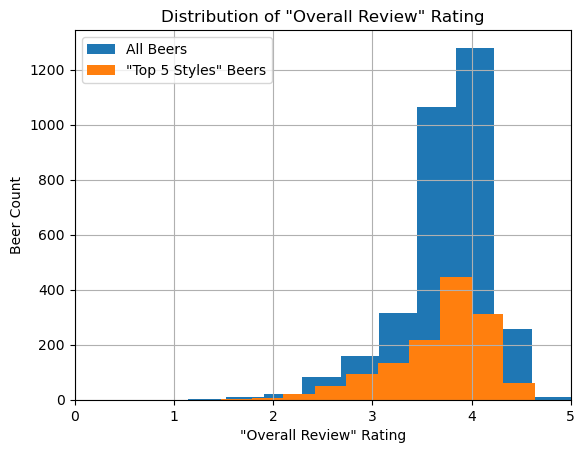

<Figure size 640x480 with 0 Axes>

In [14]:
# plot histogram to visually inspect ratings distributions across the five point rating scale
# overlay population with "top 5 styles" to be considered in analysis
overall_rvw_hist = clean_df['review_overall']

styles_top5 = clean_df.loc[(clean_df['Style_Main'] == 'Lager') |
                    (clean_df['Style_Main'] == 'IPA') |
                    (clean_df['Style_Main'] == 'Stout') | 
                    (clean_df['Style_Main'] == 'Strong Ale') |
                    (clean_df['Style_Main'] == 'Wheat Beer'),
                    ['Style_Main'] + ['review_overall']]

hist_df1 = pd.DataFrame({'data1': clean_df['review_overall'],
                        'data2': styles_top5['review_overall']})

hist_df2 = pd.DataFrame({'data1': clean_df['review_overall'],
                        'data2': styles_top5['review_overall']})

fig, ax = plt.subplots()
hist_df1.hist(column=['data1'], ax=ax)
hist_df2.hist(column=['data2'], ax=ax)
ax.set_title('Distribution of "Overall Review" Rating')
plt.xlabel('"Overall Review" Rating')
plt.xlim(0,5)
# x_ticks = range(0,.25,5.25)
# plt.xticks(x_ticks)
plt.ylabel('Beer Count')
plt.legend(['All Beers', '"Top 5 Styles" Beers'], loc='best')
plt.show()
plt.savefig("Outputs/Images/rating_distribution.png")

In [17]:
# Create dictionaries with central tendencies

overall_rvw_CT = {}
overall_rvw_CT['Mean'] = np.mean(overall_rvw_hist)
overall_rvw_CT['Median'] = np.median(overall_rvw_hist)
overall_rvw_CT['Mode'] = stats.mode(overall_rvw_hist)

styles_top5_CT = {}
styles_top5_CT['Mean'] = np.mean(styles_top5['review_overall'])
styles_top5_CT['Median'] = np.median(styles_top5['review_overall'])
styles_top5_CT['Mode'] = stats.mode(styles_top5['review_overall'])

# print both distributions (population and top style subset)
print(f"Central tendencies of the Overall Review rating for ALL BEERS in the dataset: ")
print(f"{overall_rvw_CT}")
print(F"--------------------------------")
print(f"Central tendencies of the Overall Review rating for only Top 5 Styles in the dataset: ")
print(f"{styles_top5_CT}")
print(F"--------------------------------")

Central tendencies of the Overall Review rating for ALL BEERS in the dataset: 
{'Mean': 3.747521867062871, 'Median': 3.830239, 'Mode': ModeResult(mode=4.0, count=95)}
--------------------------------
Central tendencies of the Overall Review rating for only Top 5 Styles in the dataset: 
{'Mean': 3.6772016606875937, 'Median': 3.8, 'Mode': ModeResult(mode=4.0, count=26)}
--------------------------------


**Commentary on distribution of overall impression ratings for the beers in the dataset:**

As the histograms suggest, the distribution of ratings are left skewed with mean less than median, and median less than mode.

Given these are ratings by beer enthusiasts and given the ratings recommendations [*], it is perhaps unsurprising to see the ratings skewed and clustered near the higher end of the scale.

For the five main beer styles by total number of reviews, the mean and median are slightly lower than for the overall dataset. The modes are the same, but this may be in part because the ratings are scaled in 0.25 point increments, potentially pulling the modes closer together than if ratings were allowed to be fully free floating.

The median likely makes sense as the primary measure of central tendency due to the nature of the dataset.

In [18]:
# Export file as a CSV, without the Pandas index, but with the header
clean_df.to_csv("Outputs/cleanbeer.csv", index=False, header=True)